# Exploratory Data Analysis for Spotify Tracks

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

## (Down)load data
We are using **Spotify Dataset 1921-2020, 600k+ Tracks** which is build from the Spotify API. Please download the [`tracks.csv` dataset from kaggle, 112 MB](https://www.kaggle.com/datasets/yamaerenay/spotify-dataset-19212020-600k-tracks?select=tracks.csv) and [`artist.csv` dataset from kaggle, 65 MB](https://www.kaggle.com/datasets/yamaerenay/spotify-dataset-19212020-600k-tracks?select=artists.csv)
... and put both in the `data` folder of the project repository. This notebook should be in the `notebooks` folder of the project repository.

In [2]:
tracks_df = pd.read_csv('../data/tracks.csv')
artists_df = pd.read_csv('../data/artists.csv')

In [3]:
tracks_df.head()

id                                 name  popularity  \
0  35iwgR4jXetI318WEWsa1Q                                Carve           6   
1  021ht4sdgPcrDgSk7JTbKY  Capítulo 2.16 - Banquero Anarquista           0   
2  07A5yehtSnoedViJAZkNnc   Vivo para Quererte - Remasterizado           0   
3  08FmqUhxtyLTn6pAh6bk45        El Prisionero - Remasterizado           0   
4  08y9GfoqCWfOGsKdwojr5e                  Lady of the Evening           0   

   duration_ms  explicit              artists                  id_artists  \
0       126903         0              ['Uli']  ['45tIt06XoI0Iio4LBEVpls']   
1        98200         0  ['Fernando Pessoa']  ['14jtPCOoNZwquk5wd9DxrY']   
2       181640         0  ['Ignacio Corsini']  ['5LiOoJbxVSAMkBS2fUm3X2']   
3       176907         0  ['Ignacio Corsini']  ['5LiOoJbxVSAMkBS2fUm3X2']   
4       163080         0      ['Dick Haymes']  ['3BiJGZsyX9sJchTqcSA7Su']   

  release_date  danceability  energy  key  loudness  mode  speechiness  \
0   1922-02-22         0.645  0.4450    0   -13.338     1       0.4510   
1   1922-06-01         0.695  0.2630    0   -22.136     1       0.9570   
2   1922-03-21         0.434  0.1770    1   -21.180     1       0.0512   
3   1922-03-21         0.321  0.0946    7   -27.961     1       0.0504   
4         1922         0.402  0.1580    3   -16.900     0       0.0390   

   acousticness  instrumentalness  liveness  valence    tempo  time_signature  
0         0.674            0.7440     0.151    0.127  104.851               3  
1         0.797            0.0000     0.148    0.655  102.009               1  
2         0.994            0.0218     0.212    0.457  130.418               5  
3         0.995            0.9180     0.104    0.397  169.980               3  
4         0.989            0.1300     0.311    0.196  103.220               4

In [4]:
artists_df.head()

id  followers genres  \
0  0DheY5irMjBUeLybbCUEZ2        0.0     []   
1  0DlhY15l3wsrnlfGio2bjU        5.0     []   
2  0DmRESX2JknGPQyO15yxg7        0.0     []   
3  0DmhnbHjm1qw6NCYPeZNgJ        0.0     []   
4  0Dn11fWM7vHQ3rinvWEl4E        2.0     []   

                                             name  popularity  
0  Armid & Amir Zare Pashai feat. Sara Rouzbehani           0  
1                                     ปูนา ภาวิณี           0  
2                                           Sadaa           0  
3                                       Tra'gruda           0  
4                          Ioannis Panoutsopoulos           0

In [5]:
tracks_df.shape, artists_df.shape

((586672, 20), (1162095, 5))

In [6]:
# Cut the brackets around numerical data
tracks_df['id_artists'] = [i[2:-2] for i in tracks_df['id_artists']]
tracks_df['release_year'] = [int(i.split('-')[0]) for i in tracks_df['release_date']]

tracks_df.head()

id                                 name  popularity  \
0  35iwgR4jXetI318WEWsa1Q                                Carve           6   
1  021ht4sdgPcrDgSk7JTbKY  Capítulo 2.16 - Banquero Anarquista           0   
2  07A5yehtSnoedViJAZkNnc   Vivo para Quererte - Remasterizado           0   
3  08FmqUhxtyLTn6pAh6bk45        El Prisionero - Remasterizado           0   
4  08y9GfoqCWfOGsKdwojr5e                  Lady of the Evening           0   

   duration_ms  explicit              artists              id_artists  \
0       126903         0              ['Uli']  45tIt06XoI0Iio4LBEVpls   
1        98200         0  ['Fernando Pessoa']  14jtPCOoNZwquk5wd9DxrY   
2       181640         0  ['Ignacio Corsini']  5LiOoJbxVSAMkBS2fUm3X2   
3       176907         0  ['Ignacio Corsini']  5LiOoJbxVSAMkBS2fUm3X2   
4       163080         0      ['Dick Haymes']  3BiJGZsyX9sJchTqcSA7Su   

  release_date  danceability  energy  ...  loudness  mode  speechiness  \
0   1922-02-22         0.645  0.4450  ...   -13.338     1       0.4510   
1   1922-06-01         0.695  0.2630  ...   -22.136     1       0.9570   
2   1922-03-21         0.434  0.1770  ...   -21.180     1       0.0512   
3   1922-03-21         0.321  0.0946  ...   -27.961     1       0.0504   
4         1922         0.402  0.1580  ...   -16.900     0       0.0390   

   acousticness  instrumentalness  liveness  valence    tempo  time_signature  \
0         0.674            0.7440     0.151    0.127  104.851               3   
1         0.797            0.0000     0.148    0.655  102.009               1   
2         0.994            0.0218     0.212    0.457  130.418               5   
3         0.995            0.9180     0.104    0.397  169.980               3   
4         0.989            0.1300     0.311    0.196  103.220               4   

   release_year  
0          1922  
1          1922  
2          1922  
3          1922  
4          1922  

[5 rows x 21 columns]

In [7]:
## filter songs to reduce dataframe size

#exclude non-music content
tracks_df = tracks_df[tracks_df['speechiness']<0.66] #above 0.66 are tracks with only spoken words, not music

tracks_df.shape

(564058, 21)

In [8]:
# merge tracks and artist dataframes
artists_df.rename(columns = {'id': 'id_artists','popularity': 'artists_popularity'}, inplace = True)
artists_df.drop(['genres', 'name'],axis = 1, inplace = True)

tracks_df = tracks_df.merge(artists_df, on = 'id_artists')
del artists_df

In [9]:
tracks_df.head()

id      name  popularity  duration_ms  explicit  \
0  35iwgR4jXetI318WEWsa1Q     Carve           6       126903         0   
1  0PH9AACae1f957JAavhOl2  Lazy Boi           0       157333         0   
2  2SiNuAZ6jIU9xhClRKXcST    Sketch           0        87040         0   
3  4vV7uBcF2AnjNTOejBS5oL   L'enfer           0        40000         0   
4  598LlBn6jpEpVbLjmZPsYV  Graphite           0       104400         0   

   artists              id_artists release_date  danceability   energy  ...  \
0  ['Uli']  45tIt06XoI0Iio4LBEVpls   1922-02-22         0.645  0.44500  ...   
1  ['Uli']  45tIt06XoI0Iio4LBEVpls   1922-02-22         0.298  0.46000  ...   
2  ['Uli']  45tIt06XoI0Iio4LBEVpls   1922-02-22         0.634  0.00399  ...   
3  ['Uli']  45tIt06XoI0Iio4LBEVpls   1922-02-22         0.657  0.32500  ...   
4  ['Uli']  45tIt06XoI0Iio4LBEVpls   1922-02-22         0.644  0.68400  ...   

   speechiness  acousticness  instrumentalness  liveness  valence    tempo  \
0       0.4510         0.674             0.744    0.1510    0.127  104.851   
1       0.4530         0.521             0.856    0.4360    0.402   87.921   
2       0.0377         0.926             0.919    0.1050    0.396   79.895   
3       0.2540         0.199             0.856    0.0931    0.105   81.944   
4       0.1990         0.144             0.802    0.0847    0.138  100.031   

   time_signature  release_year  followers  artists_popularity  
0               3          1922       91.0                   4  
1               4          1922       91.0                   4  
2               4          1922       91.0                   4  
3               5          1922       91.0                   4  
4               4          1922       91.0                   4  

[5 rows x 23 columns]

In [10]:
tracks_df.isnull().sum() #no null values

id                    0
name                  0
popularity            0
duration_ms           0
explicit              0
artists               0
id_artists            0
release_date          0
danceability          0
energy                0
key                   0
loudness              0
mode                  0
speechiness           0
acousticness          0
instrumentalness      0
liveness              0
valence               0
tempo                 0
time_signature        0
release_year          0
followers             0
artists_popularity    0
dtype: int64

In [11]:
corr = tracks_df.corr()

In [12]:
# show correlation of popularity with other features in descending order
corr['popularity'][np.absolute(corr['popularity'])>0.01].sort_values(ascending = False)

popularity            1.000000
artists_popularity    0.567611
release_year          0.566352
loudness              0.281752
energy                0.261373
followers             0.231527
explicit              0.175030
danceability          0.142529
time_signature        0.074359
duration_ms           0.069867
tempo                 0.057545
speechiness           0.027401
key                   0.014377
mode                 -0.016540
liveness             -0.041517
valence              -0.042216
instrumentalness     -0.198077
acousticness         -0.336503
Name: popularity, dtype: float64

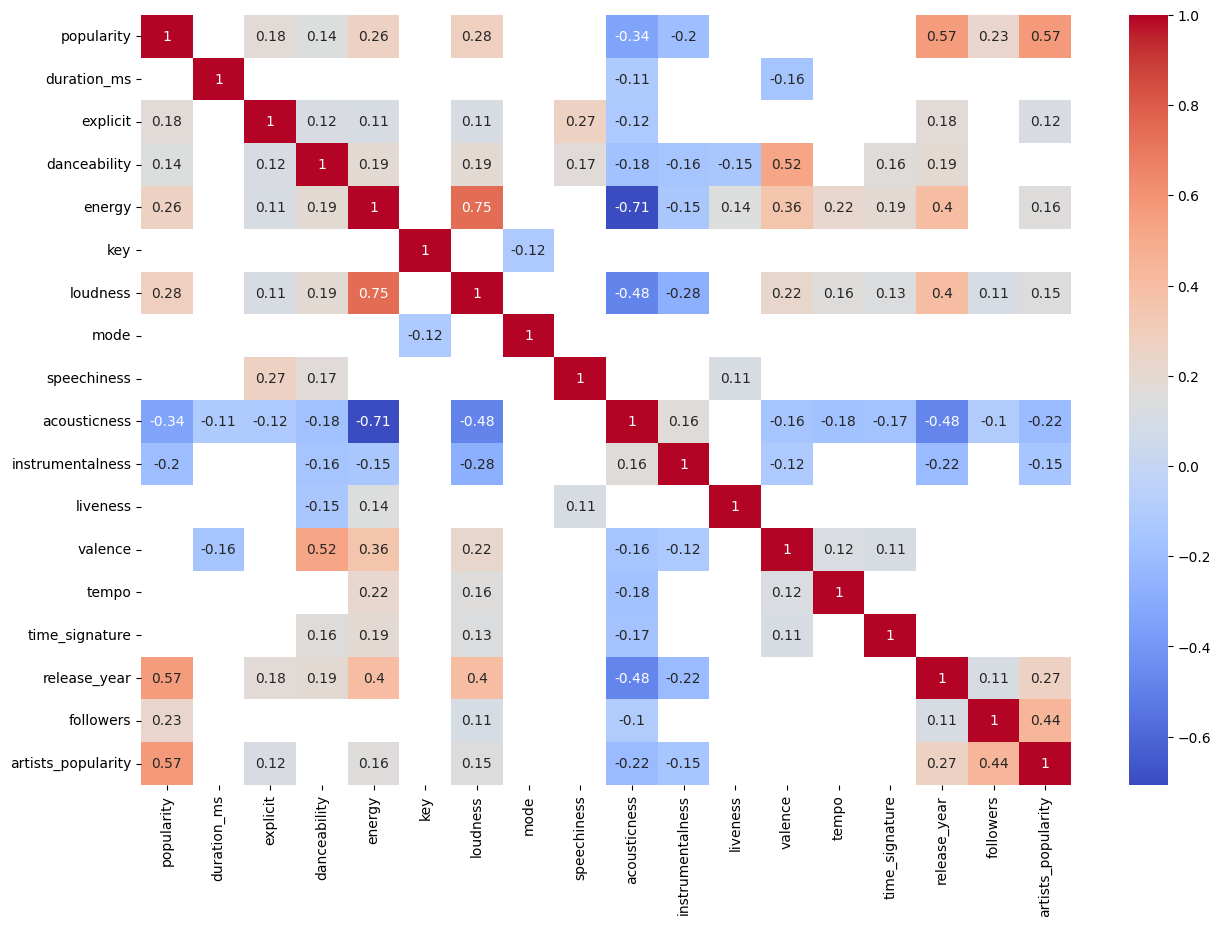

In [13]:
fig, ax = plt.subplots(figsize= (15,10))
sns.heatmap(corr[np.absolute(corr)>0.1], annot = True, cmap='coolwarm')
plt.show()

### Reduce memory usage of dataframe

In [14]:
#Based on this great kernel https://www.kaggle.com/arjanso/reducing-dataframe-memory-size-by-65

def reduce_mem_usage(df):
    start_mem_usg = df.memory_usage().sum() / 1024**2 
    print("Memory usage of properties dataframe is :",start_mem_usg," MB")
    NAlist = [] # Keeps track of columns that have missing values filled in. 
    for col in df.columns:
        if df[col].dtype != object:  # Exclude strings              
            # make variables for Int, max and min
            IsInt = False
            mx = df[col].max()
            mn = df[col].min()
            # Integer does not support NA, therefore, NA needs to be filled
            if not np.isfinite(df[col]).all(): 
                NAlist.append(col)
                df[col].fillna(mn-1,inplace=True)  
                   
            # test if column can be converted to an integer
            asint = df[col].fillna(0).astype(np.int64)
            result = (df[col] - asint)
            result = result.sum()
            if result > -0.01 and result < 0.01:
                IsInt = True            
            # Make Integer/unsigned Integer datatypes
            if IsInt:
                if mn >= 0:
                    if mx < 255:
                        df[col] = df[col].astype(np.uint8)
                    elif mx < 65535:
                        df[col] = df[col].astype(np.uint16)
                    elif mx < 4294967295:
                        df[col] = df[col].astype(np.uint32)
                    else:
                        df[col] = df[col].astype(np.uint64)
                else:
                    if mn > np.iinfo(np.int8).min and mx < np.iinfo(np.int8).max:
                        df[col] = df[col].astype(np.int8)
                    elif mn > np.iinfo(np.int16).min and mx < np.iinfo(np.int16).max:
                        df[col] = df[col].astype(np.int16)
                    elif mn > np.iinfo(np.int32).min and mx < np.iinfo(np.int32).max:
                        df[col] = df[col].astype(np.int32)
                    elif mn > np.iinfo(np.int64).min and mx < np.iinfo(np.int64).max:
                        df[col] = df[col].astype(np.int64)    
            # Make float datatypes 32 bit
            else:
                df[col] = df[col].astype(np.float32)
    # Print final result
    print("___MEMORY USAGE AFTER COMPLETION:___")
    mem_usg = df.memory_usage().sum() / 1024**2 
    print("Memory usage is: ",mem_usg," MB")
    print("This is ",100*mem_usg/start_mem_usg,"% of the initial size")

In [15]:
# Randomly sample only 10% of the dataset ---> remove this for final training
tracks_df = tracks_df.sample(n=int(tracks_df.shape[0]/10))
tracks_df.shape

(45201, 23)

In [16]:
X = tracks_df.drop(['popularity'], axis = 1)
y = tracks_df['popularity']

reduce_mem_usage(X)

Memory usage of properties dataframe is : 7.931694030761719  MB
___MEMORY USAGE AFTER COMPLETION:___
Memory usage is:  4.267596244812012  MB
This is  53.80434782608695 % of the initial size


In [17]:
y.describe()

count    45201.000000
mean        28.629654
std         17.566122
min          0.000000
25%         15.000000
50%         28.000000
75%         41.000000
max         94.000000
Name: popularity, dtype: float64

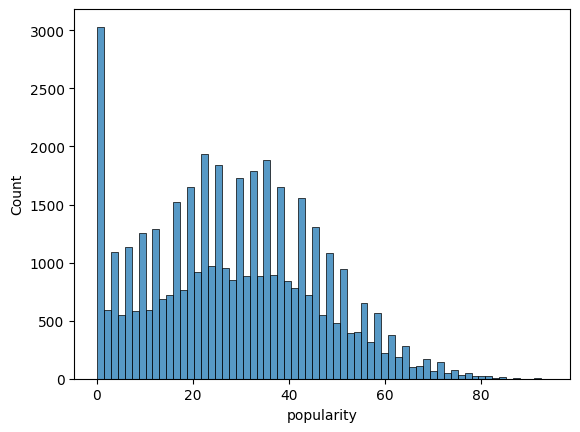

In [18]:
# target distribution
sns.histplot(y)
plt.show()

In [224]:
X.shape # 23 features

(45201, 22)

In [19]:
X.dtypes

id                     object
name                   object
duration_ms            uint32
explicit                uint8
artists                object
id_artists             object
release_date           object
danceability          float32
energy                float32
key                     uint8
loudness              float32
mode                    uint8
speechiness           float32
acousticness          float32
instrumentalness      float32
liveness              float32
valence               float32
tempo                 float32
time_signature          uint8
release_year           uint16
followers              uint32
artists_popularity      uint8
dtype: object

In [20]:
# drop select columns --> removing all object columns, removing all non-continous
X = X.drop(columns=["id", "artists", "id_artists", "release_date", "key", "time_signature"], axis=1)
X.dtypes

name                   object
duration_ms            uint32
explicit                uint8
danceability          float32
energy                float32
loudness              float32
mode                    uint8
speechiness           float32
acousticness          float32
instrumentalness      float32
liveness              float32
valence               float32
tempo                 float32
release_year           uint16
followers              uint32
artists_popularity      uint8
dtype: object

In [21]:
X.describe()

duration_ms      explicit  danceability        energy      loudness  \
count  4.520100e+04  45201.000000  45201.000000  45201.000000  45201.000000   
mean   2.315086e+05      0.036769      0.561962      0.561796     -9.639414   
std    1.172722e+05      0.188196      0.159196      0.244756      4.476142   
min    1.037100e+04      0.000000      0.000000      0.000020    -48.361000   
25%    1.798130e+05      0.000000      0.456000      0.373000    -12.215000   
50%    2.174530e+05      0.000000      0.571000      0.568000     -8.889000   
75%    2.638400e+05      0.000000      0.677000      0.763000     -6.338000   
max    4.490003e+06      1.000000      0.980000      1.000000      3.273000   

               mode   speechiness  acousticness  instrumentalness  \
count  45201.000000  45201.000000  45201.000000      45201.000000   
mean       0.664587      0.068963      0.419954          0.099028   
std        0.472140      0.077308      0.341275          0.248448   
min        0.000000      0.000000      0.000001          0.000000   
25%        0.000000      0.032900      0.079500          0.000000   
50%        1.000000      0.041700      0.369000          0.000028   
75%        1.000000      0.064900      0.738000          0.006700   
max        1.000000      0.659000      0.996000          1.000000   

           liveness       valence         tempo  release_year     followers  \
count  45201.000000  45201.000000  45201.000000  45201.000000  4.520100e+04   
mean       0.205722      0.563181    119.832512   1989.303776  1.112326e+06   
std        0.177986      0.255321     29.393412     21.109503  3.937938e+06   
min        0.012700      0.000000      0.000000   1900.000000  0.000000e+00   
25%        0.096900      0.356000     97.134003   1976.000000  1.380800e+04   
50%        0.135000      0.573000    118.889999   1993.000000  1.003230e+05   
75%        0.263000      0.783000    137.738007   2006.000000  6.173140e+05   
max        0.999000      1.000000    220.098999   2021.000000  7.890023e+07   

       artists_popularity  
count        45201.000000  
mean            50.024092  
std             19.320212  
min              0.000000  
25%             38.000000  
50%             51.000000  
75%             64.000000  
max            100.000000

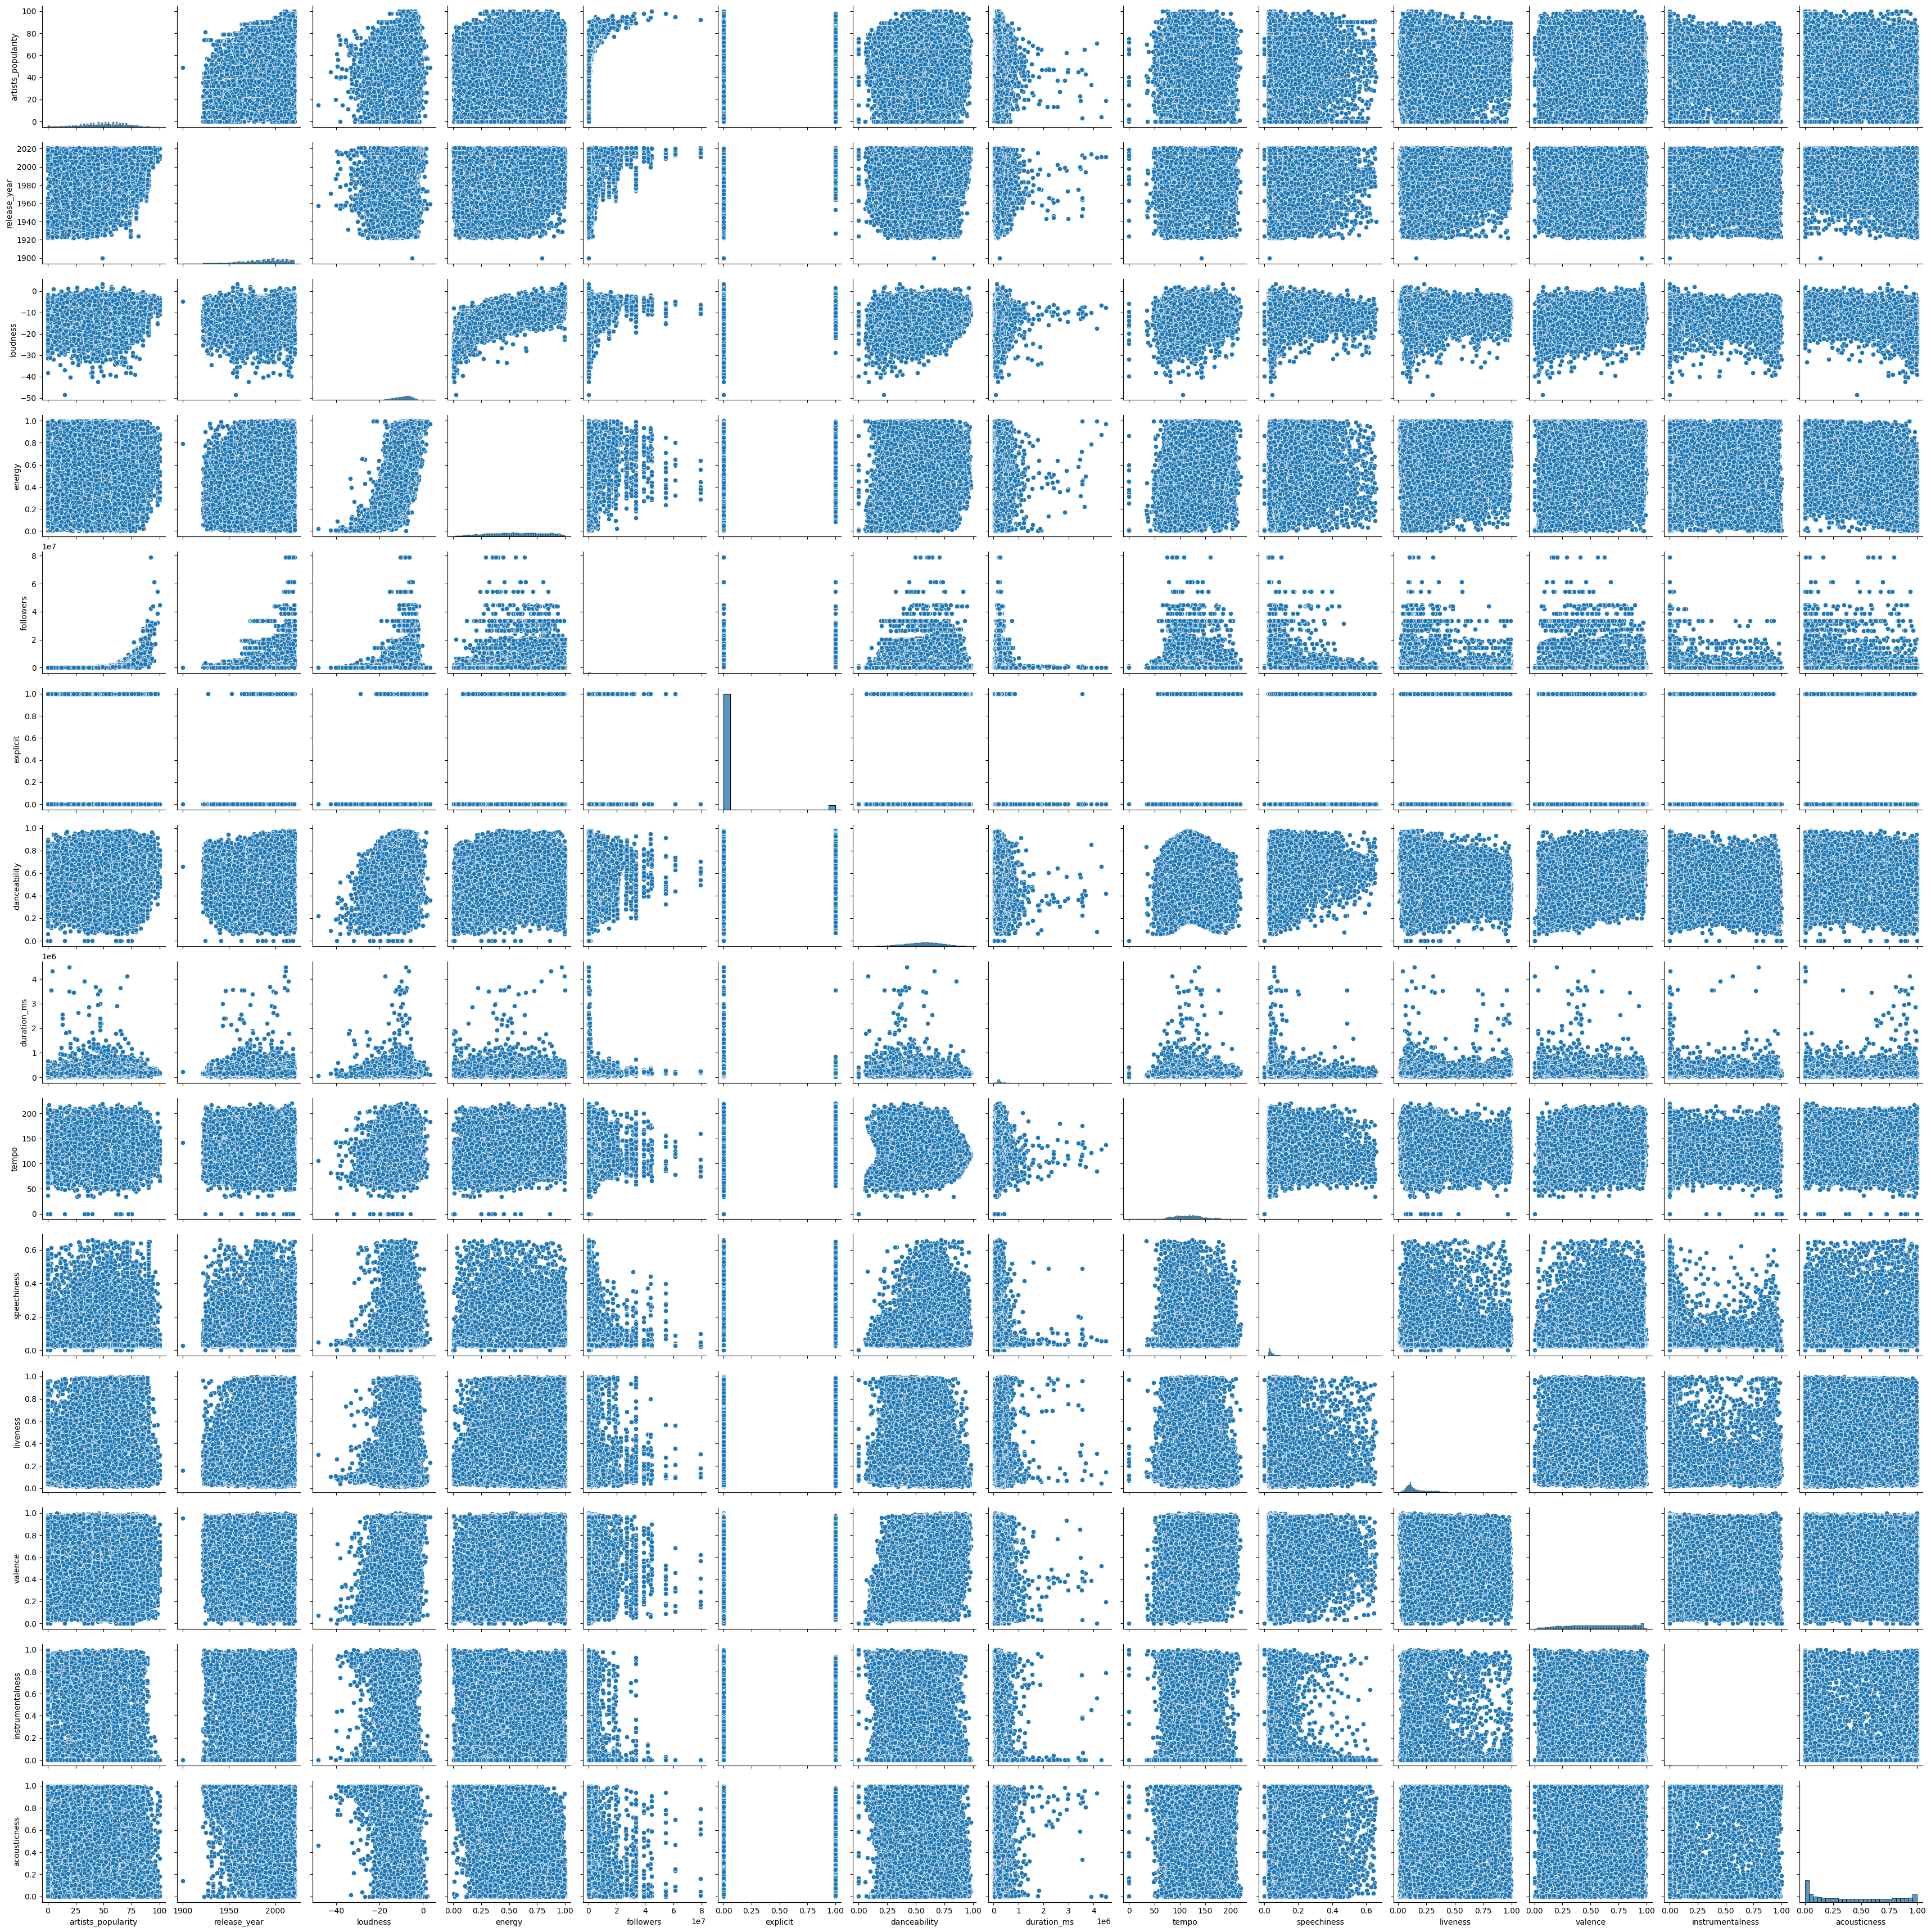

In [22]:
# artists_popularity    0.567611
# release_year          0.566352
# loudness              0.281752
# energy                0.261373
# followers             0.231527
# explicit              0.175030
# danceability          0.142529
# time_signature        0.074359
# duration_ms           0.069867
# tempo                 0.057545
# speechiness           0.027401
# key                   0.014377
# mode                 -0.016540
# liveness             -0.041517
# valence              -0.042216
# instrumentalness     -0.198077
# acousticness         -0.336503
# For first trainings, speed things up by selecting only a few features
X_select = X[["artists_popularity", "release_year", "loudness",
             "energy", "followers", "explicit", "danceability", 
             "duration_ms", "tempo", "speechiness",
             "liveness", "valence", "instrumentalness", "acousticness"]]
sns.pairplot(X_select)
plt.show()

# Part II: The modeling

In [23]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_select, y, test_size = 0.2, random_state = 0)

### Preprocessing + Training Pipeline

In [24]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

## Baseline Model: Decision Trees

In [25]:
from sklearn.tree import DecisionTreeRegressor

dt_reg = DecisionTreeRegressor()

In [26]:
dt_reg.fit(X_train,y_train)

dt_pred = dt_reg.predict(X_test)

In [27]:
rmse_dt = mean_squared_error(y_test, dt_pred,squared=False)
print("Root Mean Squared Error for Decision Tree Regressor:", round(rmse_dt, 3))

Root Mean Squared Error for Decision Tree Regressor: 15.642


In [28]:
print("R2 Score for Decision Tree Regressor:", round(r2_score(y_test, dt_pred), 3))

R2 Score for Decision Tree Regressor: 0.2


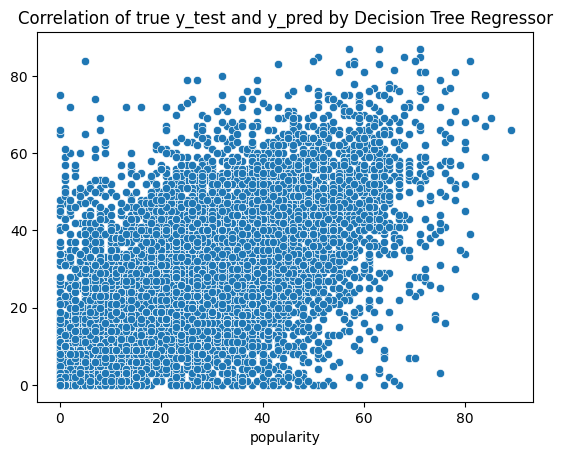

In [43]:
sns.scatterplot(x=y_test, y=dt_pred)
plt.title("Correlation of true y_test and y_pred by Decision Tree Regressor")
plt.show()

## Train using XGBoost Regressor

In [29]:
from xgboost import XGBRegressor

xgb_reg = XGBRegressor(
    reg_alpha=0.025, 
    reg_lambda=0.5, 
    n_estimators=5000,
    learning_rate=0.01, 
    random_state=0, 
    colsample_bytree=0.6,
    subsample = 0.8,
    max_depth = 20,
    eval_metric = 'rmsle'
    )

xgb_reg

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.6, early_stopping_rounds=None,
             enable_categorical=False, eval_metric='rmsle', gamma=None,
             gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.01, max_bin=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=20,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, n_estimators=5000, n_jobs=None,
             num_parallel_tree=None, predictor=None, random_state=0,
             reg_alpha=0.025, reg_lambda=0.5, ...)

In [34]:
xgb_reg.fit(X_train,y_train,eval_set=[(X_test,y_test)],verbose=False)

xgb_pred = xgb_reg.predict(X_test)
    
rmse_xgb = mean_squared_error(y_test, xgb_pred,squared=False)

In [35]:
print("Root Mean Squared Error for XGBoost Regressor:", round(rmse_xgb, 3))

Root Mean Squared Error for XGBoost Regressor: 11.116


In [36]:
print("R2 Score for XGBoost Regressor:", round(r2_score(y_test, xgb_pred), 3))

R2 Score for XGBoost Regressor: 0.596


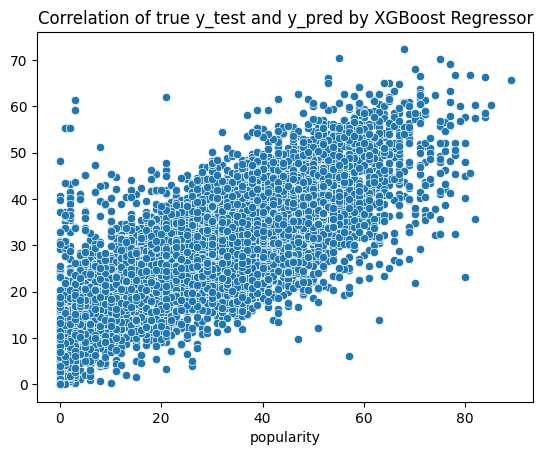

In [37]:
sns.scatterplot(x=y_test, y=xgb_pred)
plt.title("Correlation of true y_test and y_pred by XGBoost Regressor")
plt.show()

## Training using Random Forest Model

In [38]:
from sklearn.ensemble import RandomForestRegressor

rf_reg = RandomForestRegressor(random_state = 42, n_estimators=300, min_samples_leaf=3)
rf_reg.fit(X_train,y_train)

rf_pred = rf_reg.predict(X_test)


In [39]:
rmse_rf = mean_squared_error(y_test, rf_pred, squared=False)

print("Root Mean Squared Error for Random Forest Regressor:", round(rmse_rf, 3))

Root Mean Squared Error for Random Forest Regressor: 10.997


In [40]:
print("R2 Score for Random Forest Regressor:", round(r2_score(y_test, rf_pred), 3))

R2 Score for Random Forest Regressor: 0.605


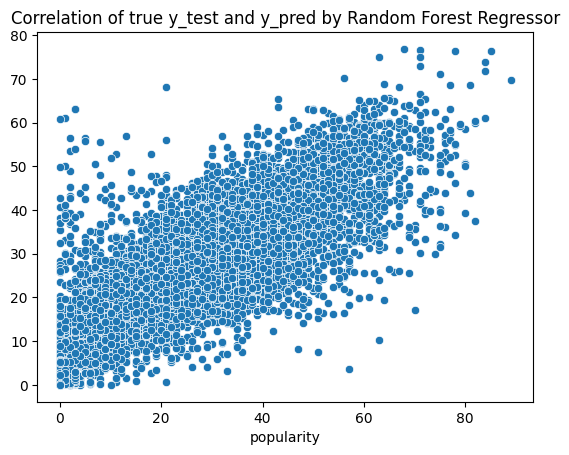

In [41]:
sns.scatterplot(x=y_test, y=rf_pred)
plt.title("Correlation of true y_test and y_pred by Random Forest Regressor")
plt.show()

## Build Ensemble Score

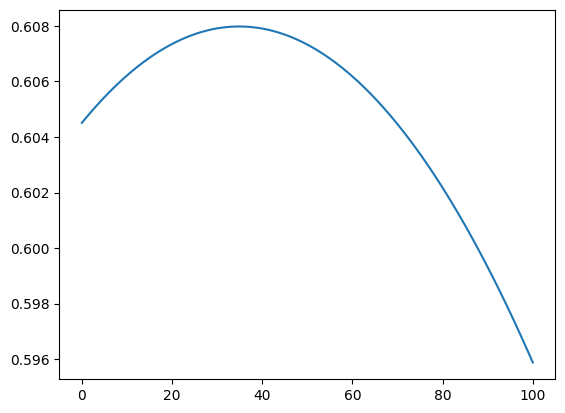

best ensemble prediction with R2: 0.608


In [42]:
r2_combined =[]
for i in np.arange(101):
    y_ens = xgb_pred * i/100 + rf_pred * (1-i/100)
    r2_combined.append(r2_score(y_test, y_ens))

sns.lineplot(x=np.arange(101), y=r2_combined)
plt.show()

print("best ensemble prediction with R2:",round(max(r2_combined), 3))